In [121]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
import matplotlib.pyplot as plt

In [122]:
X = pd.read_csv("pima-indians-diabetes-features.csv")
y = pd.read_csv("pima-indians-diabetes-target.csv")

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
model = GaussianNB(var_smoothing=1e-8)

In [125]:
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]}

In [126]:
grid_search = GridSearchCV(model, param_grid, cv=5, verbose=3, n_jobs=-1)
grid_search.fit(X_train, y_train.values.ravel())

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=GaussianNB(var_smoothing=1e-08), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1, 1, 10]},
             verbose=3)

In [127]:
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'var_smoothing': 1e-09}


In [128]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train.values.ravel())

GaussianNB()

In [129]:
y_pred = best_model.predict(X_test)

In [130]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[79 20]
 [16 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



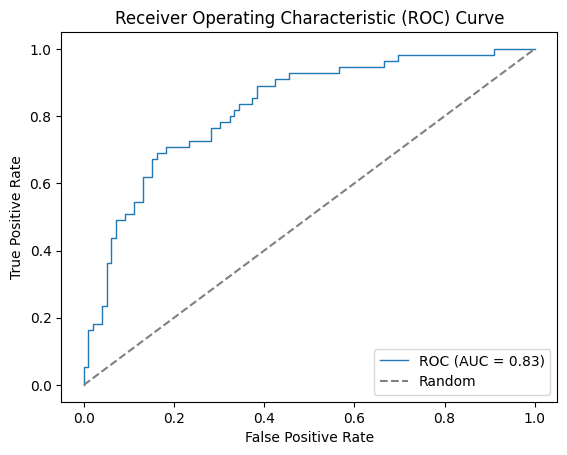

In [131]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

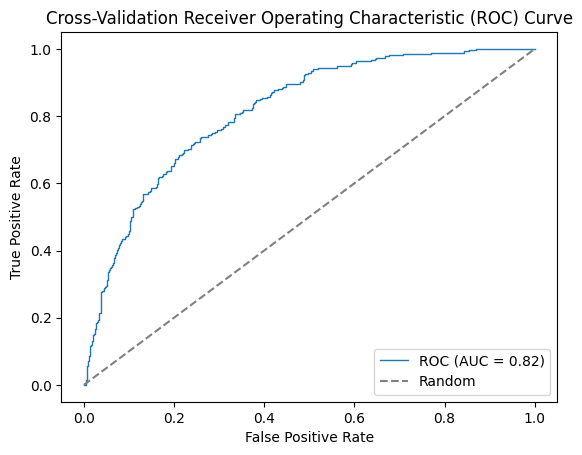

In [132]:
cv_scores = cross_val_score(best_model, X, y.values.ravel(), cv=5)
y_pred_cv = cross_val_predict(best_model, X, y.values.ravel(), cv=5, method='predict_proba')[:, 1]
fpr_cv, tpr_cv, thresholds_cv = roc_curve(y.values.ravel(), y_pred_cv)
roc_auc_cv = auc(fpr_cv, tpr_cv)
plt.plot(fpr_cv, tpr_cv, lw=1, label='ROC (AUC = %0.2f)' % (roc_auc_cv))
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cross-Validation Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [133]:
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", np.mean(cv_scores))
print("Standard deviation of cross-validation scores: ", np.std(cv_scores))

Cross-validation scores:  [0.75324675 0.72727273 0.74675325 0.78431373 0.74509804]
Mean cross-validation score:  0.7513368983957219
Standard deviation of cross-validation scores:  0.018601807594185577
